In [1]:
from fun.parameter_comparaison import *

### 1. Get the folders for the measurements of interest

In [2]:
# get the parameters for the comparaison
path_folder, wavelength, match_sequence, measurement, max_ = get_parameters()

# and the folders containing the data
data_folders, base_folders, to_be_removed = get_data_folders(path_folder, wavelength, match_sequence)

data_folders[0:5]

['./data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_1',
 './data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_10',
 './data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_11',
 './data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_12',
 './data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_13']

This corresponds to the list of the ROIs that were selected previously.

### 2. Get the data for the measurement

In [3]:
data_types, data_fixation = get_data(data_folders)

data_fixation['GM']['./data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_1']

,fname,parameter,mean,stdev,max,median,square_size
0,2022-05-02_T_P-T0_FX_M_1,azimuth,105.948340,6.598550,106.592179,106.226101,None
1,2022-05-02_T_P-T0_FX_M_1,depolarization,0.842492,0.014674,0.833088,0.841915,None
2,2022-05-02_T_P-T0_FX_M_1,diattenuation,0.022853,0.005712,0.020202,0.022613,None
3,2022-05-02_T_P-T0_FX_M_1,retardance,17.152246,1.778561,17.094972,17.217021,None
4,2022-05-03_T_P-T0-D12_FX_M_1,azimuth,124.684802,18.381570,131.731844,127.048937,None
5,2022-05-03_T_P-T0-D12_FX_M_1,depolarization,0.865873,0.013376,0.865441,0.866319,None
6,2022-05-03_T_P-T0-D12_FX_M_1,diattenuation,0.024052,0.006526,0.020202,0.023703,None
7,2022-05-03_T_P-T0-D12_FX_M_1,retardance,8.147730,3.494885,8.547486,7.742542,None
8,2022-05-03_T_P-T0-D24_FX_M_1,azimuth,118.302355,20.467000,125.698324,120.938755,None
9,2022-05-03_T_P-T0-D24_FX_M_1,depolarization,0.878232,0.012932,0.881618,0.879498,None


The data found in excel files is loaded into pandas dataframe.

In [4]:
# remove the ROI moving from white matter to grey matter and vice versa
for data_type, dfed in data_fixation.items():
    for folder, df in dfed.items():
        to_remove_dfed = to_be_removed[folder.split('\\')[0]]
        for val in to_remove_dfed:
            for fol in val:
                if fol[0] == folder.split('\\')[-1].split('_align')[0]:
                    df = df.apply(find_match_seq, match_seq = fol[1], axis = 1)
                    data_fixation[data_type][folder] = df

In [5]:
data_fixation['GM']['./data/fixation_over_time/2022-05-02_T_P-T0_FX_M_1\\polarimetry\\550nm\\50x50_images\\GM_1']

,fname,parameter,mean,stdev,max,median,square_size
0,2022-05-02_T_P-T0_FX_M_1,azimuth,105.948340,6.598550,106.592179,106.226101,None
1,2022-05-02_T_P-T0_FX_M_1,depolarization,0.842492,0.014674,0.833088,0.841915,None
2,2022-05-02_T_P-T0_FX_M_1,diattenuation,0.022853,0.005712,0.020202,0.022613,None
3,2022-05-02_T_P-T0_FX_M_1,retardance,17.152246,1.778561,17.094972,17.217021,None
4,2022-05-03_T_P-T0-D12_FX_M_1,azimuth,124.684802,18.381570,131.731844,127.048937,None
5,2022-05-03_T_P-T0-D12_FX_M_1,depolarization,0.865873,0.013376,0.865441,0.866319,None
6,2022-05-03_T_P-T0-D12_FX_M_1,diattenuation,0.024052,0.006526,0.020202,0.023703,None
7,2022-05-03_T_P-T0-D12_FX_M_1,retardance,8.147730,3.494885,8.547486,7.742542,None
8,2022-05-03_T_P-T0-D24_FX_M_1,azimuth,NaN,NaN,NaN,NaN,None
9,2022-05-03_T_P-T0-D24_FX_M_1,depolarization,NaN,NaN,NaN,NaN,None


For this example, the ROI GM_1 is located in the region labelled as background in the image obtained 24 hours after fixation, and therefore removed from further analyses.

#### 2.1. Set up the parameters to be studied

In [6]:
parameters = ['retardance', 'depolarization', 'diattenuation', 'azimuth']
metrics = ['median', 'mean', 'max']
times = ['T0', 'D12', 'D24', 'D36', 'D48', 'D7d']
    
# create the directories that will be used to store the output of the analysis
folder = create_output_directories(measurement, data_types, parameters = parameters)

#### 2.2. Get the data and save it into xlsx file

In [7]:
to_combine = get_and_organize_data(data_fixation, metrics, data_types, times, folder,
                          parameters = ['retardance', 'depolarization', 'diattenuation', 'azimuth'])

to_combine[('retardance', 'GM', 'median')]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,17.217021,10.140375,11.102332,11.210436,9.296811,11.175626,16.717762,5.538370,7.035905,11.781636,...,5.267156,4.501817,6.115349,8.013065,8.818255,5.268115,8.250772,4.636329,11.710227,5.339775
1,7.742542,4.700819,5.872947,4.513915,5.272126,5.150804,4.683363,7.745533,NaN,NaN,...,4.235821,NaN,5.969197,NaN,NaN,3.866973,NaN,NaN,NaN,NaN
2,NaN,4.712238,5.382475,4.823980,6.228819,NaN,5.127231,7.608984,NaN,NaN,...,4.057944,NaN,7.251490,NaN,NaN,4.108542,NaN,6.655482,NaN,NaN
3,5.687271,5.764029,5.957872,NaN,5.920960,5.990663,5.421935,9.476822,NaN,NaN,...,3.475297,NaN,5.247725,NaN,NaN,3.100385,NaN,6.678712,NaN,3.431935
4,5.941677,6.757761,8.854246,NaN,6.411513,11.625683,6.356601,11.184465,5.726337,NaN,...,4.629731,NaN,4.617441,3.388011,NaN,3.619879,3.403829,NaN,NaN,NaN
5,6.591607,6.470242,6.223763,NaN,6.785191,8.234134,6.641288,8.269043,NaN,NaN,...,4.553303,NaN,5.861987,3.071273,NaN,3.411133,NaN,NaN,NaN,3.778253


Here, the data is splitted based on the tissue type analysed, the metric and the parameter of interest. Each row corresponds to one time point of measurement, and each column to one ROI.

In [8]:
to_combine_cv = {}
for idx, val in to_combine.items():
    if idx[0] == 'azimuth':
        to_combine_cv[idx] = combine_data_cv(val, azimuth = True)
    else:
        to_combine_cv[idx] = combine_data_cv(val)
        
to_combine_cv[('retardance', 'GM', 'median')]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000
1,0.449703,0.463574,0.528983,0.402653,0.567090,0.460896,0.280143,1.398522,NaN,NaN,...,0.804195,NaN,0.976101,NaN,NaN,0.734034,NaN,NaN,NaN,NaN
2,NaN,0.464701,0.484806,0.430312,0.669995,NaN,0.306694,1.373867,NaN,NaN,...,0.770424,NaN,1.185785,NaN,NaN,0.779888,NaN,1.435507,NaN,NaN
3,0.330328,0.568424,0.536633,NaN,0.636881,0.536047,0.324322,1.711121,NaN,NaN,...,0.659805,NaN,0.858124,NaN,NaN,0.588519,NaN,1.440517,NaN,0.642711
4,0.345105,0.666421,0.797512,NaN,0.689647,1.040271,0.380230,2.019451,0.813874,NaN,...,0.878981,NaN,0.755058,0.422811,NaN,0.687130,0.412547,NaN,NaN,NaN
5,0.382854,0.638067,0.560582,NaN,0.729841,0.736794,0.397259,1.493046,NaN,NaN,...,0.864471,NaN,0.958570,0.383283,NaN,0.647505,NaN,NaN,NaN,0.707568


And here, we are interested in the fold change, the values of the measurements after fixation are divided by the one of the ROI in the fresh tissue.

### 3. Statistical analysis

#### 3.1. Get the data to be used for the comparisons

In [9]:
# recombine the data in a different format
data_all_recombined = recombine_data_tests(to_combine)
data_all_recombined_cv = recombine_data_tests(to_combine_cv)

#### 3.2. Comparaison of the means and the means of the fold change

In [10]:
# perform the statistical test for both fold change and mean values
paired_test = t_test(data_all_recombined, times, 'median')# times[1:]])
paired_test_cv = t_test(data_all_recombined_cv, times, 'median')# times[1:]])

In [11]:
df_grouped = create_test_df(paired_test, parameter = 'median')
df_grouped_cv = create_test_df(paired_test_cv, parameter = 'median')
df_grouped_cv

Z       p_value   n_1    n_2  before/GM  \
parameter      data_type time                                                 
azimuth        GM        T0    7000.0  2.153250e-35  70.0  100.0  21.067774   
                         D12   2450.0  1.000000e+00  70.0   70.0  21.067774   
                         D24   2185.0  8.081895e-01  70.0   64.0  21.067774   
                         D36   2117.0  6.933594e-01  70.0   63.0  21.067774   
                         D48   2220.0  6.967571e-01  70.0   66.0  21.067774   
                         D7d   2381.0  8.785089e-01  70.0   67.0  21.067774   
               WM        T0    3648.0  1.048125e-29  38.0   96.0  17.548813   
                         D12    722.0  1.000000e+00  38.0   38.0  17.548813   
                         D24    682.0  6.815462e-01  38.0   38.0  17.548813   
                         D36    726.0  8.115422e-01  38.0   37.0  17.548813   
                         D48    744.0  4.926418e-01  38.0   43.0  17.548813   
                         D7d    569.0  2.916477e-01  38.0   35.0  17.548813   
depolarization GM        T0    6400.0  8.079396e-25  70.0  100.0   1.050915   
                         D12   2450.0  1.000000e+00  70.0   70.0   1.050915   
                         D24   2143.0  6.673083e-01  70.0   64.0   1.050915   
                         D36   2349.0  5.178570e-01  70.0   63.0   1.050915   
                         D48   2527.0  3.458413e-01  70.0   66.0   1.050915   
                         D7d   2266.0  7.353529e-01  70.0   67.0   1.050915   
               WM        T0    2208.0  1.728224e-02  38.0   96.0   1.005146   
                         D12    722.0  1.000000e+00  38.0   38.0   1.005146   
                         D24    673.0  6.143650e-01  38.0   38.0   1.005146   
                         D36    674.0  7.626366e-01  38.0   37.0   1.005146   
                         D48    827.0  9.283631e-01  38.0   43.0   1.005146   
                         D7d    745.0  3.800298e-01  38.0   35.0   1.005146   
retardance     GM        T0    1200.0  3.401894e-16  70.0  100.0   0.834555   
                         D12   2450.0  1.000000e+00  70.0   70.0   0.834555   
                         D24   1978.0  2.440945e-01  70.0   64.0   0.834555   
                         D36   2101.0  6.409286e-01  70.0   63.0   0.834555   
                         D48   1768.0  1.838337e-02  70.0   66.0   0.834555   
                         D7d   2261.0  7.191887e-01  70.0   67.0   0.834555   
               WM        T0     192.0  4.157354e-24  38.0   96.0   0.725601   
                         D12    722.0  1.000000e+00  38.0   38.0   0.725601   
                         D24    732.0  9.213822e-01  38.0   38.0   0.725601   
                         D36    726.0  8.115422e-01  38.0   37.0   0.725601   
                         D48    725.0  3.865329e-01  38.0   43.0   0.725601   
                         D7d    793.0  1.591729e-01  38.0   35.0   0.725601   

                               before/GM std   after/WM  after/WM std  
parameter      data_type time                                          
azimuth        GM        T0        20.798851   0.000000      0.000000  
                         D12       20.798851  21.067774     20.798851  
                         D24       20.798851  22.194131     18.891526  
                         D36       20.798851  23.071143     21.268674  
                         D48       20.798851  20.544978     16.801314  
                         D7d       20.798851  20.403537     18.763326  
               WM        T0        20.477837   0.000000      0.000000  
                         D12       20.477837  17.548813     20.477837  
                         D24       20.477837  21.532229     25.527939  
                         D36       20.477837  17.388709     22.458646  
                         D48       20.477837  21.853674     24.839906  
                         D7d       20.477837  19.827004     16.607421  
depolarization GM        

The dataframe **df_grouped_cv** contains the results of all the statistical tests performed for the fold change analysis.

In [12]:
# finally, save the results
path_statistical_test = os.path.join('results', measurement)
df_grouped.to_excel(os.path.join(path_statistical_test, 'statistical_test.xlsx'))
df_grouped_cv.to_excel(os.path.join(path_statistical_test, 'statistical_test_cv.xlsx'))

## 4. Combine the results in a single excel file

In [13]:
# this cell allows to combine the data obtained for both grey and white matter in a table that can then be used
# to plot the results using Graphpad Prism
retardance = {}
depolarization = {}
for key, param in to_combine.items():
    if key[0] == 'retardance' and key[2] == 'median':
        retardance[key[1]] = param
    elif key[0] == 'depolarization' and key[2] == 'median':
        depolarization[key[1]] = param
        
retardance_cv = {}
depolarization_cv = {}
azimuth_cv = {}
for key, param in to_combine_cv.items():
    if key[0] == 'retardance' and key[2] == 'median':
        retardance_cv[key[1]] = param
    elif key[0] == 'depolarization' and key[2] == 'median':
        depolarization_cv[key[1]] = param
    else:
        azimuth_cv[key[1]] = param
        
retardance = create_df_prism(retardance, max_)
depolarization = create_df_prism(depolarization, max_)
    
retardance_cv = create_df_prism(retardance_cv, max_)
depolarization_cv = create_df_prism(depolarization_cv, max_)
azimuth_cv = create_df_prism(azimuth_cv, max_)

retardance_cv

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.0,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN
1,0.449703,0.463574,0.528983,0.402653,0.567090,0.460896,0.280143,1.398522,NaN,NaN,...,1.156208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.464701,0.484806,0.430312,0.669995,NaN,0.306694,1.373867,NaN,NaN,...,1.290501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.330328,0.568424,0.536633,NaN,0.636881,0.536047,0.324322,1.711121,NaN,NaN,...,NaN,NaN,0.765959,NaN,NaN,0.631239,NaN,NaN,NaN,NaN
4,0.345105,0.666421,0.797512,NaN,0.689647,1.040271,0.380230,2.019451,0.813874,NaN,...,1.462534,NaN,0.540461,NaN,0.530704,0.563517,NaN,NaN,NaN,NaN
5,0.382854,0.638067,0.560582,NaN,0.729841,0.736794,0.397259,1.493046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this table, the first 100 columns corresponds to the results for grey matter, and the last 100 to the ones for white matter.

In [14]:
# finally save all the tables
path_data_prism = os.path.join('results', measurement)
retardance.to_excel(os.path.join(path_data_prism, "retardance_prism.xlsx"))
depolarization.to_excel(os.path.join(path_data_prism, "depolarization_prism.xlsx"))
retardance_cv.to_excel(os.path.join(path_data_prism, "retardance_prism_cv.xlsx"))
depolarization_cv.to_excel(os.path.join(path_data_prism, "depolarization_prism_cv.xlsx"))
azimuth_cv.to_excel(os.path.join(path_data_prism, "azimuth_prism_cv.xlsx"))

## 5. Visualization of the results

### 5.1. Fold change evolution

#### 5.1.1. Depolarization

In [102]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    a = a[~np.isnan(a)]
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., len(a)-1)
    return h, h

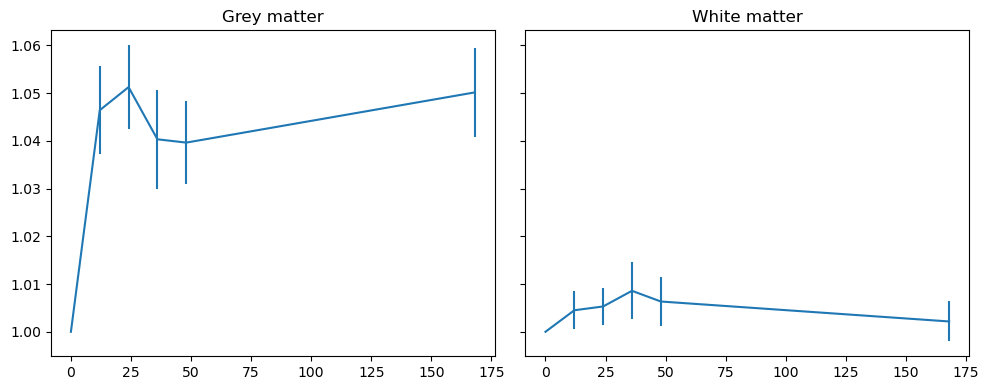

In [103]:
x = [0, 12, 24, 36, 48, 168]

fig, axs = plt.subplots(1, 2, figsize = (10,4), sharey=True)
error_grey = depolarization_cv.iloc[: , :100].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_grey = pd.DataFrame.from_dict(dict(zip(error_grey.index, error_grey.values)))
axs[0].errorbar(x, depolarization_cv.iloc[: , :100].mean(axis = 1), yerr = error_grey)
axs[0].set_title("Grey matter")

error_white = depolarization_cv.iloc[: , 100:].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_white = pd.DataFrame.from_dict(dict(zip(error_white.index, error_white.values)))
axs[1].errorbar(x, depolarization_cv.iloc[: , 100:].mean(axis = 1), yerr = error_white)
axs[1].set_title("White matter")
fig.tight_layout()

#### 5.1.2. Linear retardance

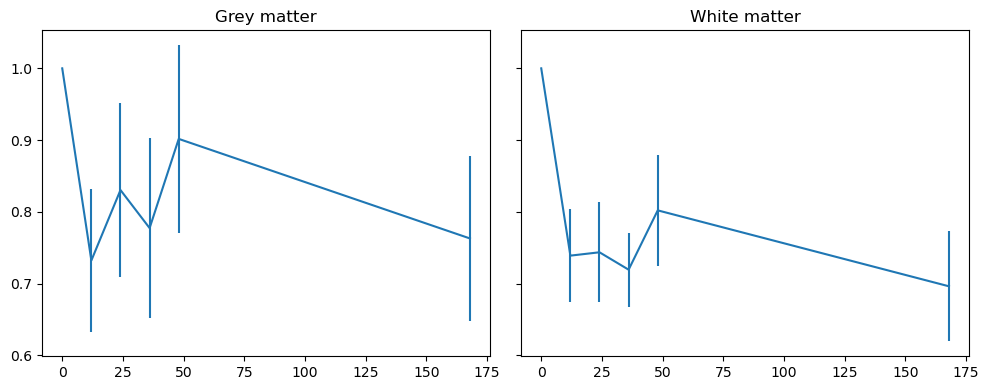

In [104]:
fig, axs = plt.subplots(1, 2, figsize = (10,4), sharey=True)
error_grey = retardance_cv.iloc[: , :100].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_grey = pd.DataFrame.from_dict(dict(zip(error_grey.index, error_grey.values)))
axs[0].errorbar(x, retardance_cv.iloc[: , :100].mean(axis = 1), yerr = error_grey)
axs[0].set_title("Grey matter")

error_white = retardance_cv.iloc[: , 100:].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_white = pd.DataFrame.from_dict(dict(zip(error_white.index, error_white.values)))
axs[1].errorbar(x, retardance_cv.iloc[: , 100:].mean(axis = 1), yerr = np.array(error_white))
axs[1].set_title("White matter")
fig.tight_layout()

### 5.2. Mean evolution

#### 5.2.1. Depolarization

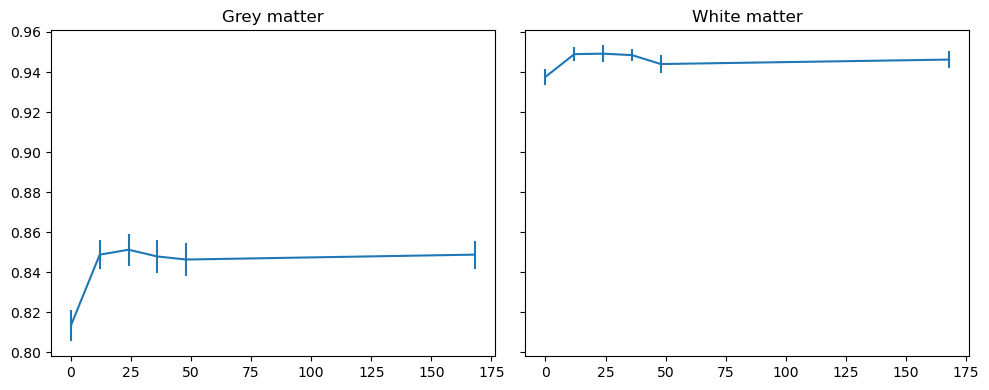

In [105]:
fig, axs = plt.subplots(1, 2, figsize = (10,4), sharey=True)
error_grey = depolarization.iloc[: , :100].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_grey = pd.DataFrame.from_dict(dict(zip(error_grey.index, error_grey.values)))
axs[0].errorbar(x, depolarization.iloc[: , :100].mean(axis = 1), yerr = error_grey)
axs[0].set_title("Grey matter")

error_white = depolarization.iloc[: , 100:].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_white = pd.DataFrame.from_dict(dict(zip(error_white.index, error_white.values)))
axs[1].errorbar(x, depolarization.iloc[: , 100:].mean(axis = 1), yerr = np.array(error_white))
axs[1].set_title("White matter")
fig.tight_layout()

#### 5.2.2. Linear retardance

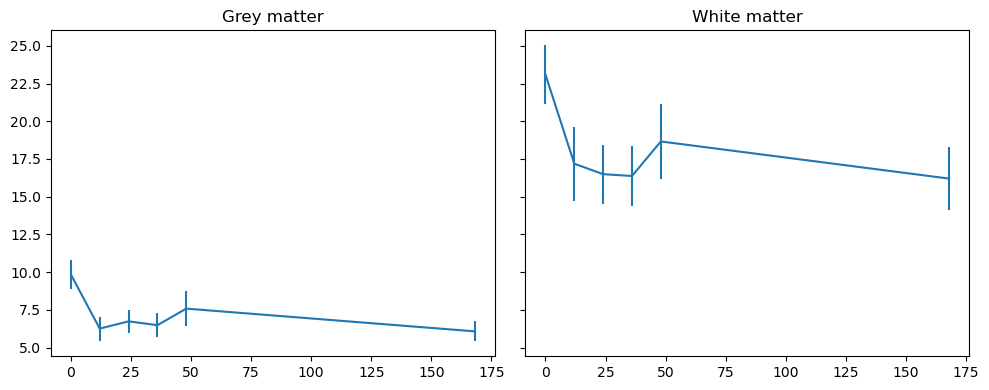

In [106]:
fig, axs = plt.subplots(1, 2, figsize = (10,4), sharey=True)
error_grey = retardance.iloc[: , :100].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_grey = pd.DataFrame.from_dict(dict(zip(error_grey.index, error_grey.values)))
axs[0].errorbar(x, retardance.iloc[: , :100].mean(axis = 1), yerr = error_grey)
axs[0].set_title("Grey matter")

error_white = retardance.iloc[: , 100:].apply(lambda x: mean_confidence_interval(x), axis = 1)
error_white = pd.DataFrame.from_dict(dict(zip(error_white.index, error_white.values)))
axs[1].errorbar(x, retardance.iloc[: , 100:].mean(axis = 1), yerr = np.array(error_white))
axs[1].set_title("White matter")
fig.tight_layout()